In [1]:
#importing modules

import sys
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
companies_dict = {
    'Amazon' : 'AMZN',
    'Apple' : 'AAPL',
    'Walgreen' : 'WBA',
    'Northrop Grumman' : 'NOC',
    'Boeing' : 'BA',
    'Lockheed Martin' : 'LMT',
    'McDonalds' : 'MCD' ,
    'Intel': 'INTC' ,
    'Navistar' : 'NAV',
    'IBM' : 'IBM' ,
    'Texas Instruments' : 'TXN',
    'MasterCard': 'MA',
    'Microsoft' : 'MSFT',
    'General Electric' : 'GE',
    'Symantec' : 'SYMC' , 
    'American Express' : 'AXP' ,
    'Pepsi' : 'PEP' , 
    'Coca Cola' : 'KO' ,
    'Johnson & Johnson' : 'JNJ' ,
    'Toyota' : 'TM', 
    'Honda' : 'HMC' ,
    'Mistubishi' : 'MSBHY' ,
    'Sony' : 'SNE' ,
    'Exxon' : 'XOM' ,
    'Chevron' : 'CVX' ,
    'Valero Energy' : 'VLO', 
    'Ford' : 'F' , 
    'bank of America' : 'BAC'
}
companies = sorted(companies_dict.items() , key = lambda x : x[1])

In [3]:
#getting stock market value data

data_source = 'yahoo'
start_date = '2015-01-01'
end_date = '2018-12-31'
panel_data = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

In [28]:
#setting up the dataset

stock_close = panel_data['Close']
stock_open = panel_data['Open']
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T
row,col = stock_close.shape

In [33]:
#storing stock price movements

movements = np.zeros([row,col])

for i in range(0,row):
    movements[i][:] = np.subtract(stock_close[i][:],stock_open[i][:])

for i in range(0,len(companies)):
    print('Company {}, Change: {}'. format(companies[i][0], sum(movements[i][:])))

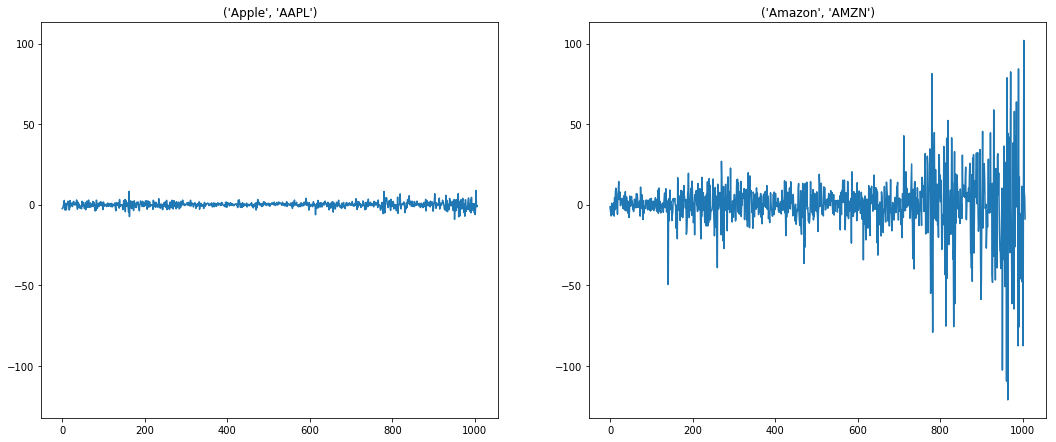

In [50]:
#visulaising the dataset

plt.clf
plt.figure(figsize=(18,16))

ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

ex1 = plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [53]:
#normalizing because some companies are worth much more than others

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.25391329298388454
-0.3329163408562679
-0.00020791860919205498


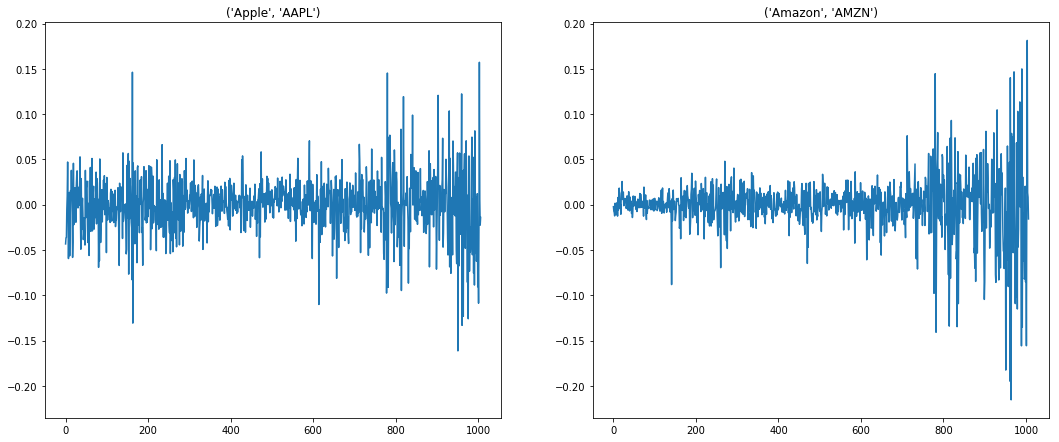

In [54]:
#visualizing dataset after normalization

plt.clf
plt.figure(figsize=(18,16))

ax1 = plt.subplot(221)
plt.plot(new[0][:])

plt.title(companies[0])

ex1 = plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [56]:
#Pipeline 

from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

#Normalizer

normalizer = Normalizer()

#K-Means model - 10 clusters (tradeoff between number of clusters and inertial)

kmeans = KMeans(n_clusters=10,max_iter = 1000)

#Make Pipeline 

pipeline = make_pipeline(normalizer, kmeans)

In [72]:
pipeline.fit(new)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [73]:
#lesser the inertia better it is

print(kmeans.inertia_)

8.212026873973455


In [78]:
labels = pipeline.predict(new)
df = pd.DataFrame({'labels':labels, 'companies':companies})

print(df.sort_values('labels'))

    labels                 companies
2        0   (American Express, AXP)
4        0    (bank of America, BAC)
0        1             (Apple, AAPL)
1        1            (Amazon, AMZN)
21       1               (Sony, SNE)
17       1         (Microsoft, MSFT)
14       1          (MasterCard, MA)
20       2              (Pepsi, PEP)
15       2          (McDonalds, MCD)
26       2           (Walgreen, WBA)
12       2           (Coca Cola, KO)
11       2  (Johnson & Johnson, JNJ)
27       3              (Exxon, XOM)
5        3            (Chevron, CVX)
8        4              (Honda, HMC)
7        4    (General Electric, GE)
6        4                 (Ford, F)
23       4              (Toyota, TM)
19       5   (Northrop Grumman, NOC)
3        5              (Boeing, BA)
13       5    (Lockheed Martin, LMT)
25       6      (Valero Energy, VLO)
9        7                (IBM, IBM)
22       7          (Symantec, SYMC)
24       7  (Texas Instruments, TXN)
10       7             (Intel, INTC)
1

In [81]:
# PCA Analysis using Singular value decomposition
from sklearn.decomposition import PCA

reduced_data = PCA(n_components = 2).fit_transform(new)

#running K-Means on reduced data

kmeans = KMeans(n_clusters = 10, max_iter=1000)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

df = pd.DataFrame({'labels':labels, 'companies':companies})

print(kmeans.inertia_)
print(df.sort_values('labels'))

0.11411466219602073
    labels                 companies
0        0             (Apple, AAPL)
3        0              (Boeing, BA)
24       0  (Texas Instruments, TXN)
21       0               (Sony, SNE)
10       0             (Intel, INTC)
26       1           (Walgreen, WBA)
25       2      (Valero Energy, VLO)
23       2              (Toyota, TM)
8        2              (Honda, HMC)
9        2                (IBM, IBM)
11       3  (Johnson & Johnson, JNJ)
15       3          (McDonalds, MCD)
1        4            (Amazon, AMZN)
17       4         (Microsoft, MSFT)
14       4          (MasterCard, MA)
27       5              (Exxon, XOM)
7        5    (General Electric, GE)
6        5                 (Ford, F)
5        5            (Chevron, CVX)
20       6              (Pepsi, PEP)
12       6           (Coca Cola, KO)
19       7   (Northrop Grumman, NOC)
13       7    (Lockheed Martin, LMT)
16       8       (Mistubishi, MSBHY)
22       8          (Symantec, SYMC)
2        8   (Amer

<Figure size 432x288 with 0 Axes>

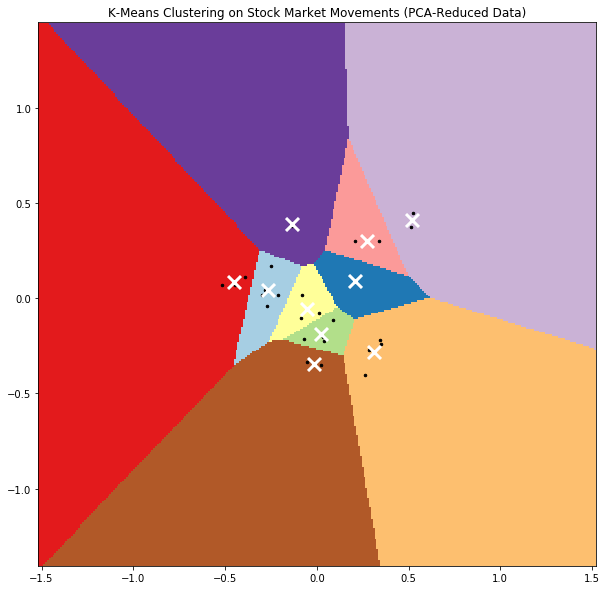

In [97]:
h = 0.01

#printing the decision boundary

x_min,x_max = reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min,y_max = reduced_data[:,1].min()-1,reduced_data[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


#labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#results in color plot
Z = Z.reshape(xx.shape)

#colorplot
cmap = plt.cm.Paired

#Plotting figure
plt.clf()
plt.figure(figsize=(10,10))

plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = cmap,
          aspect = 'auto', origin = 'lower')

plt.plot(reduced_data[:,0],reduced_data[:,1],'k.', markersize=5)

#Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],
           marker = 'x', s=169, linewidth=3,
           color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()